![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

---
# Data-X: Introduction to Numpy

**Author List (in no particular order):** [Yash Wagh](https://www.linkedin.com/in/ywagh/), [Debbie Yuen](http://www.debbiecyuen.me/), [Alexander Fred-Ojala](https://www.linkedin.com/in/alexanderfo/), [Ikhlaq Sidhu](https://ikhlaq-sidhu.com/), and [Elias Castro Hernandez](https://www.linkedin.com/in/ehcastroh/)  

**Video Walkthrough:** To view walkthrough of this notebook, click [here](https://youtu.be/jUSv47LYqpY)

**References and Additional Resources:** See end of this notebook for additional information related to NumPy.

**License Agreement:** Feel free to do whatever you want with this code

___

## What is NumPy:  

NumPy stands for **Numerical Python** and it is the fundamental package for scientific computing in Python. It is a package that lets you efficiently store and manipulate numerical arrays. It contains among other things:

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities


## NumPy contains an array object that is "fast"


<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="numpgraphs-01.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>


**It stores / consists of**:
* location of a memory block (allocated all at one time)
* a shape (3 x 3 or 1 x 9, etc)
* data type / size of each element

The core feauture that NumPy supports is its multi-dimensional arrays. In NumPy, dimensions are called axes and the number of axes is called a rank.

___

In [1]:
# written for Python 3.6
import numpy as np

In [2]:
# sanity check
np.__version__

'1.19.5'


## Creating a NumPy Array:

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="numpgraphs-02.png" align="center" width="60%" padding="0px"><br>
    <br>
</div>

___

#### Simplest possible: We use a list as an argument input in making a NumPy Array

In [3]:
# Create array from Python list
list1 = [1, 2, 3, 4]
data = np.array(list1)
data

array([1, 2, 3, 4])

In [4]:
# Find out object type
type(data)

numpy.ndarray

In [5]:
# See data type that is stored in the array
data.dtype

dtype('int64')

In [6]:
# The data types are specified for the full array, if we store
# a float in an int array, the float will be up-casted to an int
data[0] = 3.14159
data

array([3, 2, 3, 4])

In [7]:
# NumPy converts to most logical data type
data2 = np.array([1.2, 2, 3, 4])
print(data2)
print(data2.dtype) # all values will be converted to floats

[1.2 2.  3.  4. ]
float64


In [8]:
# We can manually specify the datatype
data3 = np.array([1, 2, 3], dtype=str)
print(data3)
print(data3.dtype)

['1' '2' '3']
<U1


In [9]:
# lists can also be much longer
data = np.array(range(100000))
print(data)
print()
print(len(data)) # to see the length of the full array

[    0     1     2 ... 99997 99998 99999]

100000


In [10]:
#data = np.array(1,2,3,4, 5,6,7,8,9) # wrong
data = np.array([1,2,3,4,5,6,7,8,9]) # right
print(data)

[1 2 3 4 5 6 7 8 9]


In [11]:
# the elements of an array must be of a type that is valid to perform
# a specific mathematical operation on

data = np.array([1,2,'cat', 4])
print(data)
print(data.dtype)

['1' '2' 'cat' '4']
<U21


<br>

<strong style="color:red">BEWARE OF TYPE COERCION:</strong> [Data Types](https://numpy.org/devdocs/user/basics.types.html) are specified for the full array. For example, if we store a *float* in an *int* array, the *float* will be up-casted to an *int*

___

##### <strong style="color:blue">Concept Check:</strong>  Resolve the datatype error

In [12]:
a = np.random.normal(0,1,1000)
b = np.arange(1000, dtype=np.uint8)
c = np.arange(1000, dtype=np.int16)


## uncomment and complete ##
#c += a + b
# make changesin this cell
#print(c)

___

## Accessing a NumPy Array: Slicing and Indexing

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="numpgraphs-03.png" align="center" width="50%" padding="0px"><br>
</div>

___

In [13]:
# Similar to indexing and slicing Python lists:
data = np.array(range(10))
print(data[:])
print (data[0:3])
print (data[3:])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[3 4 5 6 7 8 9]


In [14]:
print (data[::-2])

[9 7 5 3 1]


In [15]:
# more slicing
x = np.array(range(18))
print ('x:',x)
print (x[5:15:2]) # [start : end : step_size]

x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 5  7  9 11 13]


<br>

### Arrays are like lists, but different
NumPy utilizes efficient pointers to a location in memory and it will store the full array. Lists on the other hand are pointers to many different objects in memory.

In [16]:
# Slicing returns a view in Numpy, 
# and not a copy as is the case with Python lists
data = np.array(range(10))
view = data[0:3]
print(view)

[0 1 2]


In [17]:
l = list(range(10))
copy = l[0:3]
print(copy)

[0, 1, 2]


In [18]:
copy[0] = 99
view[0] = 99
print(copy)
print(view)

[99, 1, 2]
[99  1  2]


In [19]:
print('Python list:',l) # has not changed
print('NumPy array:',data) # has changed

Python list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
NumPy array: [99  1  2  3  4  5  6  7  8  9]


In [20]:
# Creating copies of the array instead of views
data = np.array(range(10))
arr_copy = data[:3].copy()
print('Array copy',arr_copy)

Array copy [0 1 2]


In [21]:
arr_copy[0] = 555
print('New array copy',arr_copy)
print('Original array',data) # now it is not a view any more

New array copy [555   1   2]
Original array [0 1 2 3 4 5 6 7 8 9]


In [22]:
# same thing with assignment, its not a copy, its the same data
x = np.array(range(20))
print (x)
y = x

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [23]:
y[:] = 0

In [24]:
print (x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
x is y

True

In [26]:
x = [1,2]
y = [1,2]
x is y

False

___

##### <strong style="color:blue">Concept Check:</strong>  Create two arrays from the following array ```a```, one with 2/3 and the other with 1/3 of the elements. 

**Note** that you don't want to mess up your original data set when you (later) make transformations on the train / test set.

In [27]:
a = np.arange(1000)
np.random.shuffle(a) # inplace

#input answer

___

<br>

### Arrays are also a lot faster than lists

In [28]:
# Arrays are faster and more efficient than lists
x = list(range(100000))

# Say that we want to square all elements
y = [i**2 for i in x]
print (y[0:10])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [29]:
# Time the operation with some IPython magic command
print('Time for Python lists:')
list_time = %timeit -o -n 20 [i**2 for i in x]

Time for Python lists:
21.4 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [30]:
z = np.array(x)
w = z**2
print(w[:10])

[ 0  1  4  9 16 25 36 49 64 81]


In [31]:
print('Time for NumPy arrays:')
np_time = %timeit -o -n 20 z**2

Time for NumPy arrays:
46.5 µs ± 6.06 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [32]:
print('NumPy is ' + str(list_time.all_runs[0]//np_time.all_runs[0]) + \
      ' times faster than lists at squaring 100 000 elements.')

NumPy is 404.0 times faster than lists at squaring 100 000 elements.


<br>

## Universal Functions

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="numpgraphs-04.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

A function that is applied on an ```ndarray``` in an element-by-element fashion. Several universal functions can be found the NumPy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html).

___

In [33]:
# Arrays are different than lists in another way:
# x and y are lists

x = list(range(5))
y = list(range(5,10))
print ("list x = ", x)
print ("list y = ", y)

list x =  [0, 1, 2, 3, 4]
list y =  [5, 6, 7, 8, 9]


In [34]:
print ("x + y = ", x+y)

x + y =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [35]:
# now lets try with NumPy arrays:
xn = np.array(x)
yn = np.array(y)
print ('np.array xn =', xn)
print ('np.array xn =', yn)

np.array xn = [0 1 2 3 4]
np.array xn = [5 6 7 8 9]


In [36]:
print ("xn + yn = ", xn + yn)

xn + yn =  [ 5  7  9 11 13]


In [37]:
# + for np.arrays is a wrapper around the u. function np.add
np.add(xn,yn)

array([ 5,  7,  9, 11, 13])

In [38]:
# An array is a sequence that can be manipulated easily
# An arithmetic operation is applied to each element individually
# When two arrays are added, they must have the same size 
# (otherwise they might be broadcasted)

# python lists
print (3* x)

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


In [39]:
# Numpy Arrays
print (3 * xn)

[ 0  3  6  9 12]


<br>

## Join, Add, Concatenate

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="numpgraphs-05.png" align="center" width="50%" padding="0px"><br>
</div>

___

In [40]:
print(xn)
print(yn)

[0 1 2 3 4]
[5 6 7 8 9]


In [41]:
# if you need to join numpy arrays, 
# try hstack, vstack, column_stack, or concatenate
np.hstack([xn, yn])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
np.vstack([xn, yn])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [43]:
np.column_stack([xn, yn])

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [44]:
np.concatenate([xn, yn], axis = 0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<br>

## Creating arrays with 2 axis:

___

In [45]:
# This list has two dimensions
list3 = [[1, 2, 3],
         [4, 5, 6]]
list3 # nested list

[[1, 2, 3], [4, 5, 6]]

In [46]:
# data = np.array([[1, 2, 3], [4, 5, 6]])
data = np.array(list3)
data

array([[1, 2, 3],
       [4, 5, 6]])

<br>

## Attributes of a Multidimensional Array

___

In [47]:
print('Dimensions:',data.ndim)
print ('Shape:',data.shape)
print('Size:', data.size)

Dimensions: 2
Shape: (2, 3)
Size: 6


In [48]:
# You can also transpose an array Matrix with either np.transpose(arr)
# or arr.T
data.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [49]:
np.transpose(data)

array([[1, 4],
       [2, 5],
       [3, 6]])

<br>

## Other ways to create NumPy arrays

___

In [50]:
# np.arange() is similar to built in range()
# Creates array with a range of consecutive numbers
# starts at 0 and step=1 if not specified. Exclusive of stop.

print(np.arange(12))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [51]:
#Array increasing from start to end: np.arange(start, end)
print(np.arange(10, 20))

[10 11 12 13 14 15 16 17 18 19]


In [52]:
# Array increasing from start to end by step: np.arange(start, end, step)
# The range always includes start but excludes end
print(np.arange(1, 10, 2))

[1 3 5 7 9]


In [53]:
# Returns a new array of specified size, filled with zeros.
print(np.zeros((2,5), dtype=np.int8))

[[0 0 0 0 0]
 [0 0 0 0 0]]


In [54]:
#Returns a new array of specified size, filled with ones.
print(np.ones((4,2), dtype=np.float128))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [55]:
# Returns the identity matrix of specific squared size
print(np.eye(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


<br>

## Some useful indexing strategies

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="numpgraphs-06.png" align="center" width="50%" padding="0px"><br>
</div>

___

#### There are two main types of indexing: Integer and Boolean

In [56]:
x = np.array([[1, 2], [3, 4], [5, 6]]) 
print(x)

[[1 2]
 [3 4]
 [5 6]]


In [57]:
## Integer indexing
# first element is  the row, 2nd element is the column
print(x[1,0])

3


In [58]:
print(x[1:,:]) # all rows after first, all columns

[[3 4]
 [5 6]]


In [59]:
# first list contains  row indices, 2nd element contains column indices
res = x[[0,1,2], [0,1,1]]  # create index object
print (res)

[1 4 6]


In [60]:
## Boolean indexing
print('Comparison operator, find all values greater than 3:\n')
print(x>3)

Comparison operator, find all values greater than 3:

[[False False]
 [False  True]
 [ True  True]]


In [61]:
print('Boolean indexing, only extract elements greater than 3:\n')
print(x[x>3])

Boolean indexing, only extract elements greater than 3:

[4 5 6]


<br>

## Masks

___

In [62]:
arr = np.arange(10)
mask = arr>5
print(mask)

[False False False False False False  True  True  True  True]


In [63]:
print(arr[mask])

[6 7 8 9]


In [64]:
# Functions any / all
np.any( arr==9 )

True

In [65]:
np.all( arr>-1 )

True

<br>

## Extra NumPy array methods

___

In [66]:
# Reshape is used to change the shape
a = np.arange(0, 15)

In [67]:
print('\nOriginal: ')
print(a)
a = a.reshape(3, 5)
# a = np.arange(0, 15).reshape(3, 5)  # same thing

print ('\nReshaped: ')
print(a)


Original: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Reshaped: 
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [68]:
# We can also flatten matrices using ravel()
x = np.array(range(24))
x = x.reshape(4,6)

print('Original:\n',x)
print()

# make it flat
x = x.ravel() 

print ('Flattened:\n',x)

Original:
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]

Flattened:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [69]:
# We can also easily find the sum, min, max, .. are easy
print (a)
print()
print ('Sum:',a.sum())
print('Min:', a.min())
print('Max:', a.max())

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Sum: 105
Min: 0
Max: 14


In [70]:
# Note here axis specifies what dimension to "collapse"
print ('Column sum:',a.sum(axis=0))
print ('Row sum:',a.sum(axis=1))

Column sum: [15 18 21 24 27]
Row sum: [10 35 60]


In [71]:
# To get the cumulative product:
print (np.arange(1, 10))
print (np.cumprod(np.arange(1, 10)))

[1 2 3 4 5 6 7 8 9]
[     1      2      6     24    120    720   5040  40320 362880]


In [72]:
# To get the cumulative sum:
print (np.arange(1, 10))
print(np.cumsum((np.arange(1, 10))))

[1 2 3 4 5 6 7 8 9]
[ 1  3  6 10 15 21 28 36 45]


In [73]:
# Creating a 3D array:
a = np.arange(0, 96).reshape(2, 6, 8)
print(a)

[[[ 0  1  2  3  4  5  6  7]
  [ 8  9 10 11 12 13 14 15]
  [16 17 18 19 20 21 22 23]
  [24 25 26 27 28 29 30 31]
  [32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47]]

 [[48 49 50 51 52 53 54 55]
  [56 57 58 59 60 61 62 63]
  [64 65 66 67 68 69 70 71]
  [72 73 74 75 76 77 78 79]
  [80 81 82 83 84 85 86 87]
  [88 89 90 91 92 93 94 95]]]


In [74]:
# The same methods typically apply in multiple dimensions
print (a.sum(axis = 0))
print ('---')
print (a.sum(axis = 1))

[[ 48  50  52  54  56  58  60  62]
 [ 64  66  68  70  72  74  76  78]
 [ 80  82  84  86  88  90  92  94]
 [ 96  98 100 102 104 106 108 110]
 [112 114 116 118 120 122 124 126]
 [128 130 132 134 136 138 140 142]]
---
[[120 126 132 138 144 150 156 162]
 [408 414 420 426 432 438 444 450]]


<br>

## Array Axis

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="numpgraphs-07.png" align="center" width="50%" padding="0px"><br>
</div>

___


### More Universal Functions and Basic Operations

One of the coolest parts of NumPy is the ability for you to run mathematical operations on top of arrays. Here are some basic operations:

In [75]:
a = np.arange(11, 21)
b = np.arange(0, 10)
print ("a = ",a)
print ("b = ",b)

a =  [11 12 13 14 15 16 17 18 19 20]
b =  [0 1 2 3 4 5 6 7 8 9]


In [76]:
print (a + b)
print (a * b) # Hadamard product
print (a ** 2)

[11 13 15 17 19 21 23 25 27 29]
[  0  12  26  42  60  80 102 126 152 180]
[121 144 169 196 225 256 289 324 361 400]


In [77]:
print ('You can even do things like matrix operations')
print (a.dot(b))

You can even do things like matrix operations
780


In [78]:
print ('Matrix multiplication')
c = np.arange(1,5).reshape(2,2)
print ("c = \n", c)
print()
d = np.arange(5,9).reshape(2,2)
print ("d = \n", d)
print()
print (np.matmul(d,c))

Matrix multiplication
c = 
 [[1 2]
 [3 4]]

d = 
 [[5 6]
 [7 8]]

[[23 34]
 [31 46]]


___

##### <strong style="color:blue">Concept Check:</strong>  $Ax = b$. Solve for $x$. Note, you should use numpy's pseudoinverse function while aligning $A$ and $b$'s dimensions. 

In [79]:
A = np.array([[1, 2, 3, 4, 5, 6]]).reshape(3,2)
b = np.array([7,8,9]).reshape(3,-1)
print(A)
print()
print(b)

# input answer
# print(x)

[[1 2]
 [3 4]
 [5 6]]

[[7]
 [8]
 [9]]


___

<br>

### Random numbers


In [80]:
# Radom numbers
np.random.seed(0)  # set the seed to zero for reproducibility
print(np.random.uniform(1,5,10))   # 10 random uniform numbers 1 to 5

[3.19525402 3.86075747 3.4110535  3.17953273 2.6946192  3.58357645
 2.75034885 4.567092   4.85465104 2.53376608]


In [81]:
print (np.random.exponential(1,5)) # 5 random exp numbers with rate 1
print (np.random.random(8).reshape(2,4)) #8 random 0-1, 2 x 4 array

[1.56889614 0.75267411 0.83943285 2.59825415 0.07368535]
[[0.0871293  0.0202184  0.83261985 0.77815675]
 [0.87001215 0.97861834 0.79915856 0.46147936]]


___

##### <strong style="color:blue">Concept Check:</strong>  Create a $10\times10$ matrix from a 100-dimensional vector with values drawn from the normal distribution of ```mean = 0```, and ```stdev = 1```.

In [82]:
#input answer

<br>

___

<br>

## Trignometric functions

___

In [83]:
# linspace: Create an array of numbers from a to b 
# with n equally spaced numbers (inclusive)

data = np.linspace(0,10,5)
print (data)

[ 0.   2.5  5.   7.5 10. ]


In [84]:
x = np.linspace(0,np.pi, 3)
print('x = ', x)
print()
print ("sin(x) = ", np.sin(x))

x =  [0.         1.57079633 3.14159265]

sin(x) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]


In [85]:
x = np.linspace(0,4*np.pi,1000)
y = np.sin(x)-np.cos(x)**2

<br>

**Matplotlib Plotting Glimpse**

In [86]:
# Plotting Set Up 
import matplotlib.pyplot as plt 

# jupyter notebook magic to display plots in output
%matplotlib inline

# make the plots bigger
plt.rcParams['figure.figsize'] = (8,5) 

In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


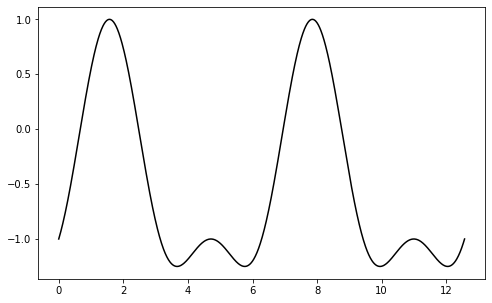

In [87]:
# plot trig-results arrays
plt.plot(x,y, color = "black")

<br>

## Prediction Example (Ordinary Least Square)

___

In [88]:
# Generate data w linear trend
x = np.linspace(0,10,50)
Y = 5 + x * 2 + np.random.normal(0, 2.5, len(x))

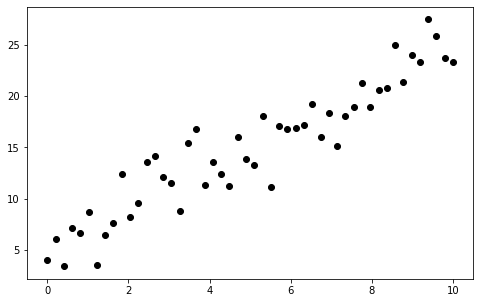

In [89]:
# quick scatter plot
plt.scatter(x,Y, color = "black");

In [90]:
# Create a 1-D array of ones and stack x to created a 2D column array.
X = np.column_stack([np.ones(len(x)),x])

In [91]:
# array slice
X[:4,:]

array([[1.        , 0.        ],
       [1.        , 0.20408163],
       [1.        , 0.40816327],
       [1.        , 0.6122449 ]])

<br>
<br>

**Remember:** $\displaystyle{Y \in R^{50x1}, X \in R^{50x2}, W \in R^{2x1}}$<br>
$$\hat{Y} = XW$$<br>
$$ SE = (Y-XW)^2$$<br>
$$ \nabla_W SE = 2X^T(Y-XW) = 0$$<br>
$$W_{ols} = (X^TX)^{-1}X^TY$$<br>

In [92]:
# use linear algebra package to compute inverse of nested dot products
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [93]:
# sanity check
W

array([5.19920286, 1.9466357 ])

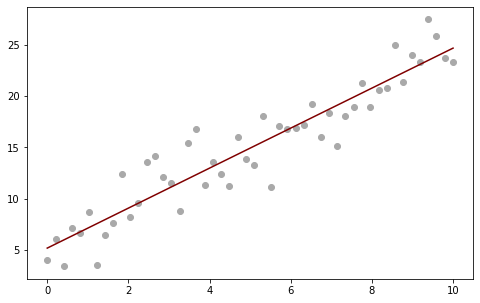

In [94]:
# plotting
plt.scatter(x,Y, color = 'darkgray');

# line plot
plt.plot(x, W[0] + W[1] * x, color = 'maroon');

___

## References and Additional Resources
___

#### Install NumPy

https://scipy.org/install.html

```bash
# To install NumPy and related packages: Copy/Paste the following and run in a cell.
$ ! python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose 
```

___

<br>

#### Methods for Statistics

In [95]:
c = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Mean of Each Row
print(c.mean(axis=1))

# Mean of Each Column
print(c.mean(axis=0))

# Standard Deviation
print(c.std(axis=0))

# Sample Standard Deviation
print(c.std(axis=0, ddof=1))

# Variance
print(c.var(axis=0))

[2. 5. 8.]
[4. 5. 6.]
[2.44948974 2.44948974 2.44948974]
[3. 3. 3.]
[6. 6. 6.]


___

<br>

#### Array Broadcasting - Two Steps

[Broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html) is usually treated as an advanced topic when learning NumPy. However, functions that support broadcasting -- [universal functions](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs) -- allow NumPy to work with arrays of different shapes when performing algorithmic computations. The idea is to use the smaller of a pair of arrays and use the smaller array repeatedly to perform some operation on the larger array -- without having to copy the data. The process functions as follows:

<br>

>**Step 1:** Prepend ones to the smaller array

```python
>>> import numpy as np
>>> a = np.ones((3,5))
>>> b = np.ones((5, ))
>>> b.reshape(1,5)  # equivalently --> b[np.newaxis, :]
```

>**Step 2:** Dimensions of size 1 are repeated (without copying)

```python
>>> import numpy as np
>>> c = a + b          # c.shape == (3,5)
# logically equivalent to
>>> temp_b = b.reshape(1,5)
>>> temp_b_repeat = temp_b.repeat(3, axis=0)
```
<br>


In [96]:
#### SOME APPLICATIONS OF BROADCASTING ####
'''
    Credit --> https://web.eecs.umich.edu/~justincj/
''';

import numpy as np

## 1. Compute outer product of vectors: ##
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)

'''
    To compute an outer product, we first reshape v to be a column
    vector of shape (3, 1); we can then broadcast it against w to yield
    an output of shape (3, 2), which is the outer product of v and w:
''';
print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [97]:
## 2. Add a vector to each row of a matrix: ##
x = np.array([[1,2,3], [4,5,6]])

'''
    x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
    giving the following matrix:
    [[2 4 6]
     [5 7 9]]
''';
print(x + v)

[[2 4 6]
 [5 7 9]]


In [98]:
## 3. Add a vector to each column of a matrix: ##

'''
    x has shape (2, 3) and w has shape (2,).
    If we transpose x then it has shape (3, 2) and can be broadcast
    against w to yield a result of shape (3, 2); transposing this result
    yields the final result of shape (2, 3) which is the matrix x with
    the vector w added to each column. Gives the following matrix:
    [[ 5  6  7]
     [ 9 10 11]]
''';
print((x.T + w).T)


'''
    Another solution is to reshape w to be a column vector of shape (2, 1);
    we can then broadcast it directly against x to produce the same
    output.
''';
print("\n", x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]

 [[ 5  6  7]
 [ 9 10 11]]


In [99]:
## 4. Multiply a matrix by a constant: ##

'''
    x has shape (2, 3). Numpy treats scalars as arrays of shape ();
    these can be broadcast together to shape (2, 3), producing the
    following array:
    [[ 2  4  6]
     [ 8 10 12]]
''';
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


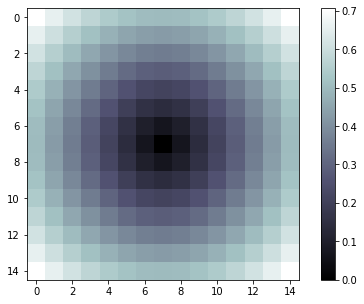

In [100]:
## 5. Visualizing Distance From a Point ##
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebook magic to display plots in output
%matplotlib inline

# make the plots bigger
plt.rcParams['figure.figsize'] = (8,5) 


## visualization ##
a = np.linspace(0,1,15) - 0.5
b = a[:, np.newaxis]                  # b.shape == (15,1)
dist_sqrd = a**2 + b**2               # broadcasting distance
dist = np.sqrt(dist_sqrd)             # sqrt of broadcasting distance
plt.imshow(dist,                      # numpy array generating the image
           cmap = 'bone',             # specify colors
           interpolation='nearest'    # blend square colors; with 'nearest' colors will not be blended
          )
plt.colorbar()                        # include value-range colorbar

___

<br>

#### More on Array Manipulation Routines

There are several ways to [manipulate NumPy Arrays](https://numpy.org/doc/stable/reference/routines.array-manipulation.html). The following shows a few ways to join arrays and split arrays.

In [101]:
# List concatenation using operator +
x = list(range(5))
y = list(range(5,10))

print("list x = ", x)
print("list y = ", y)
print("x + y = ", x + y)

list x =  [0, 1, 2, 3, 4]
list y =  [5, 6, 7, 8, 9]
x + y =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [102]:
# operator concatenation using NumPy arrays?
xn = np.array(x)
yn = np.array(y)

print("np.array xn = ", xn)
print("np.array yn = ", yn)
print("x + y = ", xn + yn)

np.array xn =  [0 1 2 3 4]
np.array yn =  [5 6 7 8 9]
x + y =  [ 5  7  9 11 13]


___
**Note:** when working with arrays, the operator ```+``` performs element-wise addition, as opposed to concatenation. The following examples illustrate how to join and split NumPy arrays.
___   

In [103]:
# element-wise addition using built-in method
np.add(xn,yn)

array([ 5,  7,  9, 11, 13])

<br>

**Join Arrays**

In [104]:
# hstack stacks arrays in sequence horizontally (column wise).
np.hstack([xn, yn])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [105]:
# vstack stacks arrays in sequence vertically (row wise).
np.vstack([xn, yn])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [106]:
# dstack stack arrays in sequence depth wise (along third axis).
np.dstack([xn, yn])

array([[[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]]])

In [107]:
# column_stack stack 1-D arrays as columns into a 2-D array.
np.column_stack([xn, yn])

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [108]:
# append to xn the elements of yn in one array
np.concatenate([xn, yn], axis = 0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<br>

**Split Arrays**

In [109]:
# Create (3x4) array
xyz = np.arange(16.0).reshape(2, 2, 4)
xyz

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.]],

       [[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]]])

In [110]:
# Split an array x into multiple sub-arrays n --> array_split(x, n).
np.array_split(xyz, 3)

[array([[[0., 1., 2., 3.],
         [4., 5., 6., 7.]]]),
 array([[[ 8.,  9., 10., 11.],
         [12., 13., 14., 15.]]]),
 array([], shape=(0, 2, 4), dtype=float64)]

In [111]:
# Split array into multiple sub-arrays along the 3rd axis (depth).
np.dsplit(xyz, np.array([0, 2]))

[array([], shape=(2, 2, 0), dtype=float64),
 array([[[ 0.,  1.],
         [ 4.,  5.]],
 
        [[ 8.,  9.],
         [12., 13.]]]),
 array([[[ 2.,  3.],
         [ 6.,  7.]],
 
        [[10., 11.],
         [14., 15.]]])]

In [112]:
# Split an array into multiple sub-arrays horizontally (column-wise).
np.hsplit(xyz, 2)

[array([[[ 0.,  1.,  2.,  3.]],
 
        [[ 8.,  9., 10., 11.]]]),
 array([[[ 4.,  5.,  6.,  7.]],
 
        [[12., 13., 14., 15.]]])]

In [113]:
# Split an array into multiple sub-arrays vertically (row-wise).
np.vsplit(xyz, np.array([3, 6]))

[array([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.]],
 
        [[ 8.,  9., 10., 11.],
         [12., 13., 14., 15.]]]),
 array([], shape=(0, 2, 4), dtype=float64),
 array([], shape=(0, 2, 4), dtype=float64)]

___

<br>

#### More on Multi-Dimensional Arrays

In [114]:
# Create multi-dimensional array
mda = np.array([[0, 1, 2, 3], 
                [10, 11, 12, 13],
                [100, 111, 122, 133]])
mda

array([[  0,   1,   2,   3],
       [ 10,  11,  12,  13],
       [100, 111, 122, 133]])

In [115]:
# explore multi-dimensional object
print("\nArray data type: ", type(mda))
print("\nElement type: ", mda.dtype)
print("\nNo. dimensions: ", mda.ndim)
print("\nArray shape: ", mda.shape)
print("\nBytes per element: ", mda.itemsize)
print("\nBytes of memory used: ", mda.nbytes)


Array data type:  <class 'numpy.ndarray'>

Element type:  int64

No. dimensions:  2

Array shape:  (3, 4)

Bytes per element:  8

Bytes of memory used:  96


In [116]:
# get element
print(mda, "\n")
mda[1,2]

[[  0   1   2   3]
 [ 10  11  12  13]
 [100 111 122 133]] 



12

In [117]:
# set element
mda[0,3] = -1
mda

array([[  0,   1,   2,  -1],
       [ 10,  11,  12,  13],
       [100, 111, 122, 133]])

In [118]:
# access rows by index
mda[2]

array([100, 111, 122, 133])

<br>

**Create Subarray**

In [119]:
'''
Extract subarray consisting of first two rows and
columns 3 and 4, yielding a (2x2) array
'''
sub_a = mda[:2, 2:]
sub_a

array([[ 2, -1],
       [12, 13]])

<br>

**Get Rows Using Array Indexing + Slicing**

In [120]:
# Integer indexing with slices
row_v1 = mda[1, :]    # 2nd row, all columns
row_v1

array([10, 11, 12, 13])

In [121]:
# Slicing only
row_v2 = mda[1:2, :] 
row_v2

array([[10, 11, 12, 13]])

In [122]:
## sanity check ##
print(mda, "\n\n")
print(row_v1, row_v1.shape)  
print(row_v2, row_v2.shape)  

[[  0   1   2  -1]
 [ 10  11  12  13]
 [100 111 122 133]] 


[10 11 12 13] (4,)
[[10 11 12 13]] (1, 4)


___

**Note:** Accessing data from the middle of an array can create different subarrays depending on how it is extracted. This is because NumPy utilizes efficient pointers to a location in memory where it will store the location of the slice. These memory location can be used in operations. The following exhibits the behavior.
    
___

<br>

**Get Columns Using Array Indexing + Slicing**

In [123]:
# Now with columns
col_v1 = mda[:, 1]    # slicing with integer indexing
col_v2 = mda[:, 1:2]  # slicing only

## sanity check ##
print(mda, "\n\n")
print(col_v1, col_v1.shape)  
print(" ")
print(col_v2, col_v2.shape) 

[[  0   1   2  -1]
 [ 10  11  12  13]
 [100 111 122 133]] 


[  1  11 111] (3,)
 
[[  1]
 [ 11]
 [111]] (3, 1)


<br>

___

## Additional Content and Sources


>[Numpy Manual](https://numpy.org/doc/stable/)<br>
>[NumPy Array Progranming by Real Python](https://realpython.com/numpy-array-programming)<br>
>[Python NumPy Tutorial for Beginners by FreeCodeCamp.org](https://youtu.be/QUT1VHiLmmI)<br>
>[Introduction to Numerical Computing with NumPy by Alex Chabot-Leclerc](https://youtu.be/ZB7BZMhfPgk)<br>
>[A Visual Intro to NumPy and Data Representation by Jay Alammar](http://jalammar.github.io/visual-numpy/)

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="DataX_icon_wide_logo.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

___